# STUDENT PERFORMANCE PREDICTION USING REGRESSION MODELS......

# Importing necessary Libraries

In [1]:
import pandas as pd
import pickle
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt


# Loading the dataset

In [2]:
data=pd.read_csv("C:/Users/gonab/OneDrive/Desktop/student data.csv")
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [3]:
data.shape

(10000, 6)

# Checking For Null Values

In [4]:
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [5]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [7]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [8]:
data.tail()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0
9999,7,74,No,8,1,64.0


In [9]:
list(data)

['Hours Studied',
 'Previous Scores',
 'Extracurricular Activities',
 'Sleep Hours',
 'Sample Question Papers Practiced',
 'Performance Index']

In [10]:
data['Performance Index'].unique()

array([ 91.,  65.,  45.,  36.,  66.,  61.,  63.,  42.,  69.,  84.,  73.,
        27.,  33.,  68.,  43.,  67.,  70.,  30.,  71.,  85.,  57.,  35.,
        49.,  83.,  74.,  39.,  58.,  47.,  60.,  32.,  64.,  54.,  17.,
        53.,  75.,  52.,  78.,  38.,  98.,  87.,  41.,  81.,  15.,  88.,
        95.,  29.,  21.,  76.,  25.,  34.,  50.,  56.,  82.,  23.,  46.,
        92.,  77.,  86.,  44.,  94.,  40., 100.,  31.,  26.,  18.,  51.,
        72.,  16.,  28.,  89.,  48.,  37.,  62.,  59.,  19.,  79.,  22.,
        10.,  90.,  80.,  24.,  20.,  96.,  55.,  97.,  12.,  93.,  14.,
        99.,  11.,  13.])

In [11]:
data['Hours Studied'].unique()

array([7, 4, 8, 5, 3, 6, 2, 1, 9], dtype=int64)

In [12]:
data.groupby(['Extracurricular Activities']).count()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
Extracurricular Activities,,,,,
No,5052,5052,5052,5052,5052
Yes,4948,4948,4948,4948,4948


In [13]:
data['Extracurricular Activities'] = data['Extracurricular Activities'].replace({"Yes":1,"No":0})
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


# modelling

In [14]:
x= data.drop("Performance Index",axis=1)
y = data['Performance Index']
x

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


In [15]:
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.35, random_state=42)
x_test.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
6252,5,69,0,8,2
4684,2,46,1,4,8
1731,7,56,1,7,5
4742,6,42,1,8,5
4521,7,53,0,4,6


In [17]:
x_test.shape

(3500, 5)

In [18]:
x_train.shape

(6500, 5)

In [19]:
y_test.shape

(3500,)

In [20]:
y_train.shape

(6500,)

In [21]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)


LinearRegression()

In [22]:
ypred=reg.predict(x_test)
ypred

array([54.74593132, 22.6239535 , 47.94233387, ..., 50.22572059,
       67.52614263, 66.15639535])

In [23]:
from sklearn.metrics import r2_score   #FOR 0.25.0.30,0.35 I GOT THIS ACCURACY
r2_score(y_test,ypred)

0.9889151059916766

In [24]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ypred,y_test)

4.123188763980219

In [25]:
Results=pd.DataFrame(columns=['Actual','Predicted'])
Results['Actual']=y_test
Results['Predicted']=ypred
Results=Results.reset_index()
Results['ID']=Results.index
Results.head(15)


,index,Actual,Predicted,ID
0,6252,51.0,54.745931,0
1,4684,20.0,22.623954,1
2,1731,46.0,47.942334,2
3,4742,28.0,31.338086,3
4,4521,41.0,43.063581,4
5,6340,59.0,59.123547,5
6,576,48.0,45.969381,6
7,5202,87.0,86.424260,7
8,6363,37.0,37.744513,8
9,439,73.0,72.061621,9


# Data Visualization

[]

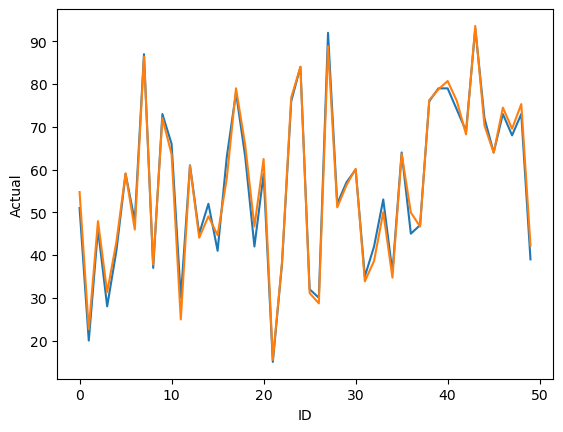

In [26]:

sns.lineplot(x='ID',y='Actual',data=Results.head(50))
sns.lineplot(x='ID',y='Predicted',data=Results.head(50))#BLUE
plt.plot()

[]

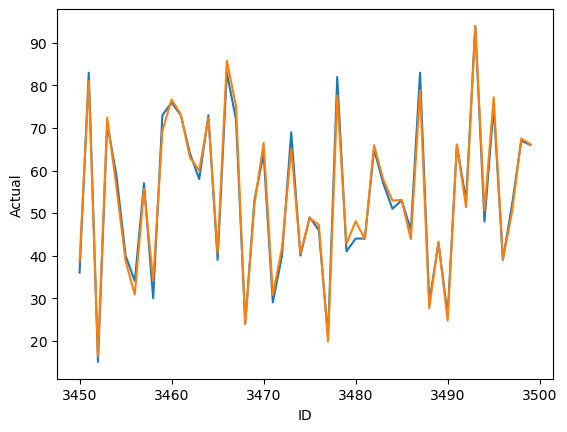

In [27]:
sns.lineplot(x='ID',y='Actual',data=Results.tail(50))#blue
sns.lineplot(x='ID',y='Predicted',data=Results.tail(50))
plt.plot()

In [28]:
cor_mat=data.corr()
cor_mat

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.003873,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.008369,0.005944,0.007888,0.915189
Extracurricular Activities,0.003873,0.008369,1.000000,-0.023284,0.013103,0.024525
Sleep Hours,0.001245,0.005944,-0.023284,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.013103,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.024525,0.048106,0.043268,1.000000


<Axes: >

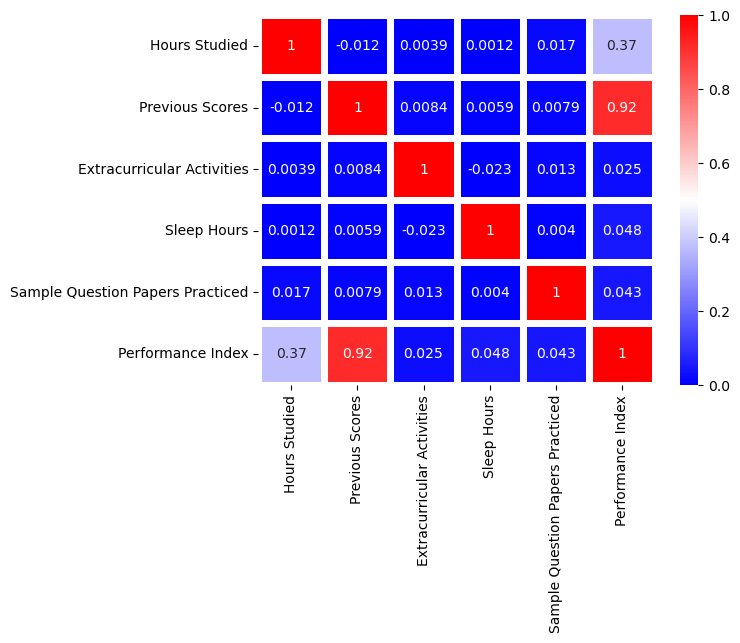

In [29]:
sns.heatmap(cor_mat,vmax=1,vmin=0,annot=True,linewidths=5,cmap='bwr')

In [30]:
new=[[7,99,1,9,1]]
real=reg.predict(new)
real

array([91.81761956])

In [31]:
#If in case of any overfitting in LR we choose lasso and ridge regressions

# Laaso Regression

In [32]:
# Lesat absolute shrinkage and selector operator
#from sklearn.linear_model import Lasso

#reg = Lasso(alpha=1e-15)
#reg.fit(x_train, y_train)

In [56]:
from sklearn.model_selection import GridSeachCV
#from sklearn.grid_search import GridSearchCV


from sklearn.linear_model import Lasso

alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20,30]

lasso = Lasso()

parameters = {'alpha': alpha}

lasso_regressor = GridSearchCV(lasso, parameters)

lasso_regressor.fit(x_train, y_train)

ImportError: cannot import name 'GridSeachCV' from 'sklearn.model_selection' (C:\Users\gonab\anaconda3\Lib\site-packages\sklearn\model_selection\__init__.py)

In [34]:
lasso_regressor.best_params_

{'alpha': 1e-15}

In [58]:
lasso=Lasso(alpha=1e-15)
lasso.fit(x_train,y_train)
y_pred_lasso=lasso.predict(x_test)
y_pred_lasso

array([54.74593132, 22.6239535 , 47.94233387, ..., 50.22572059,
       67.52614263, 66.15639535])

In [36]:
from sklearn.metrics import mean_squared_error
Lasso_Error=mean_squared_error(y_pred_lasso,y_test)
Lasso_Error

4.123188763980215

# Accuracy for Lasso

In [37]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_lasso)

0.9889151059916766

In [38]:
Results=pd.DataFrame(columns=['Actual','Predicted'])
Results['Actual']=y_test
Results['Predicted']=y_pred_lasso
Results=Results.reset_index()
Results['ID']=Results.index
Results.head(15)

,index,Actual,Predicted,ID
0,6252,51.0,54.745931,0
1,4684,20.0,22.623954,1
2,1731,46.0,47.942334,2
3,4742,28.0,31.338086,3
4,4521,41.0,43.063581,4
5,6340,59.0,59.123547,5
6,576,48.0,45.969381,6
7,5202,87.0,86.424260,7
8,6363,37.0,37.744513,8
9,439,73.0,72.061621,9


[]

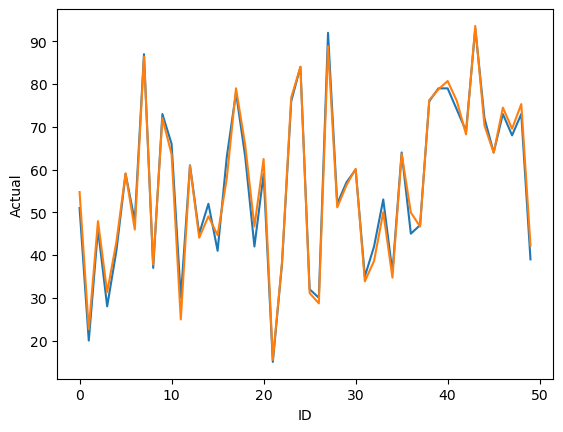

In [39]:
sns.lineplot(x='ID',y='Actual',data=Results.head(50))#blue
sns.lineplot(x='ID',y='Predicted',data=Results.head(50))
plt.plot()

# Ridge Regression

In [40]:
from sklearn.model_selection import GridSearchCV
#from sklearn.grid_search import GridSearchCV


from sklearn.linear_model import Ridge

alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20,30]

ridge = Ridge()

parameters = {'alpha': alpha}

ridge_regressor = GridSearchCV(ridge, parameters)

ridge_regressor.fit(x_train, y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20, 30]})

In [41]:
ridge_regressor.best_params_

{'alpha': 5}

In [42]:
ridge=Ridge(alpha=1)
ridge.fit(x_train,y_train)
y_pred_ridge=ridge.predict(x_test)
y_pred_ridge

array([54.74608269, 22.62402527, 47.94200819, ..., 50.22566503,
       67.52578443, 66.1565577 ])

In [43]:
from sklearn.metrics import mean_squared_error
Ridge_Error=mean_squared_error(y_pred_ridge,y_test)
Ridge_Error

4.123187560180294

# Accuracy for Ridge

In [44]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_ridge)

0.9889151092280055

In [45]:
Results=pd.DataFrame(columns=['Actual','Predicted'])
Results['Actual']=y_test
Results['Predicted']=y_pred_ridge
Results=Results.reset_index()
Results['ID']=Results.index
Results.head(15)

,index,Actual,Predicted,ID
0,6252,51.0,54.746083,0
1,4684,20.0,22.624025,1
2,1731,46.0,47.942008,2
3,4742,28.0,31.337807,3
4,4521,41.0,43.063701,4
5,6340,59.0,59.123528,5
6,576,48.0,45.969210,6
7,5202,87.0,86.424289,7
8,6363,37.0,37.744552,8
9,439,73.0,72.061235,9


[]

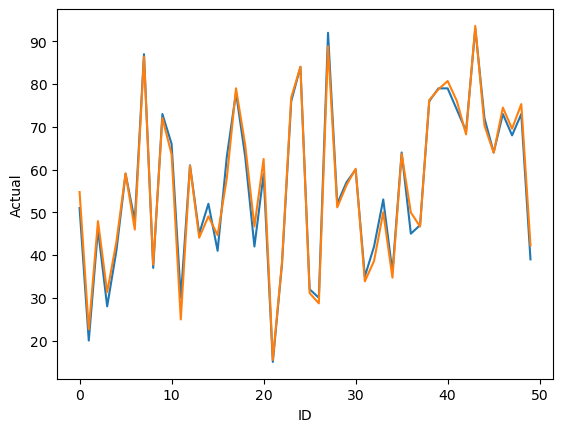

In [46]:
sns.lineplot(x='ID',y='Actual',data=Results.head(50))#blue
sns.lineplot(x='ID',y='Predicted',data=Results.head(50))
plt.plot()

# Elastic Net

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

elastic = ElasticNet()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

elastic_regressor = GridSearchCV(elastic, parameters)

elastic_regressor.fit(x_train, y_train)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]})

In [48]:
 elastic_regressor.best_params_

{'alpha': 1e-15}

In [49]:
elastic=ElasticNet(alpha=1e-15)
elastic.fit(x_train,y_train)
y_pred_elastic=elastic.predict(x_test)
y_pred_elastic

array([54.74593132, 22.6239535 , 47.94233387, ..., 50.22572059,
       67.52614263, 66.15639535])

# Accuracy For Elastic Net

In [50]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_elastic)

0.9889151059916766

In [51]:
elastic_Error=mean_squared_error(y_pred_elastic,y_test)
elastic_Error

4.123188763980217

In [52]:
Results=pd.DataFrame(columns=['Actual','Predicted'])
Results['Actual']=y_test
Results['Predicted']=y_pred_elastic
Results=Results.reset_index()
Results['ID']=Results.index
Results.head(15)

,index,Actual,Predicted,ID
0,6252,51.0,54.745931,0
1,4684,20.0,22.623954,1
2,1731,46.0,47.942334,2
3,4742,28.0,31.338086,3
4,4521,41.0,43.063581,4
5,6340,59.0,59.123547,5
6,576,48.0,45.969381,6
7,5202,87.0,86.424260,7
8,6363,37.0,37.744513,8
9,439,73.0,72.061621,9


[]

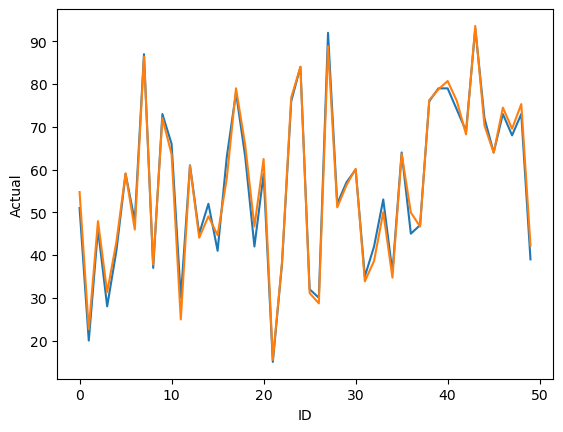

In [53]:
sns.lineplot(x='ID',y='Actual',data=Results.head(50))#blue
sns.lineplot(x='ID',y='Predicted',data=Results.head(50))
plt.plot()

In [54]:
filename='model'
pickle.dump(reg,open(filename,'wb'))

In [55]:
  SIZE     LR       LASSO      RIDGE        ELASTIC
   0.25   0.98     0.98       0.98         0.98
   0.30   0.98     0.98       0.98         0.98
   0.35   0.98     0.98       0.98         0.98
    


SyntaxError: invalid syntax (310899980.py, line 1)